# 2.2- Visualización con Pandas

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

**Line plot**

2000-01-01   -1.463125
2000-01-02    0.743331
2000-01-03    1.365807
2000-01-04   -0.446509
2000-01-05    0.359021
Freq: D, dtype: float64

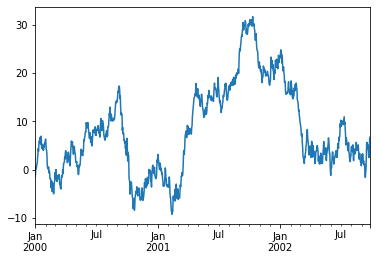

In [2]:
df=pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

display(df.head())

df=df.cumsum()

df.plot();

,A,B,C,D
2000-01-01,-1.515058,-0.188232,0.996939,0.407718
2000-01-02,-0.245649,-0.380481,0.835190,0.410842
2000-01-03,0.878662,0.731998,-0.712050,1.142253
2000-01-04,-0.761935,0.853929,-0.403283,-0.820322
2000-01-05,0.370870,-1.492080,0.338110,0.042431


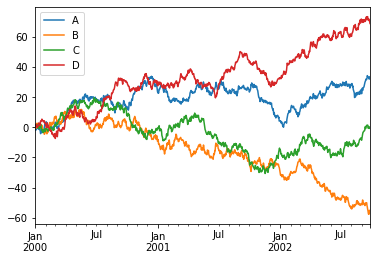

In [3]:
df=pd.DataFrame(np.random.randn(1000, 4), index=df.index, columns=list('ABCD'))

display(df.head())

df=df.cumsum()

df.plot();

,B,C,A
2000-01-01,1.407634,-1.866519,0
2000-01-02,3.093071,-1.685976,1
2000-01-03,4.910836,-1.828200,2
2000-01-04,3.906852,-0.681655,3
2000-01-05,2.632533,-0.183764,4


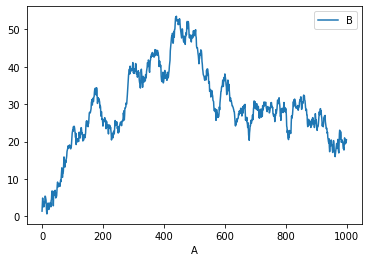

In [4]:
df=pd.DataFrame(np.random.randn(1000, 2), index=df.index, columns=['B', 'C']).cumsum()

df['A']=list(range(len(df)))

display(df.head())

df.plot(x='A', y='B');

**Bar plot**

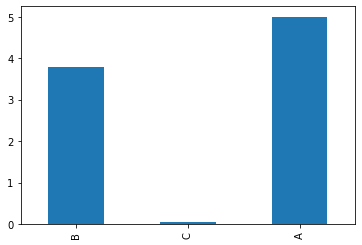

In [5]:
df.iloc[5].plot(kind='bar');

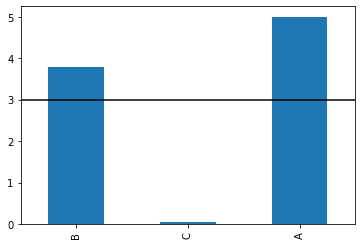

In [6]:
df.iloc[5].plot(kind='bar')

plt.axhline(3, color='k');  # linea horizontal valor 3 color negro

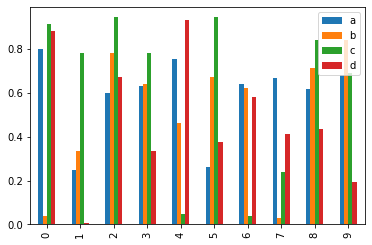

In [7]:
df=pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df.plot.bar();

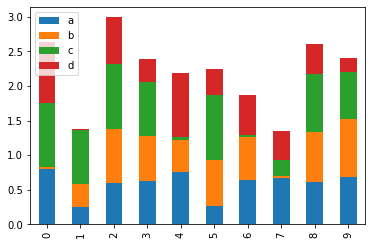

In [8]:
df.plot.bar(stacked=True);

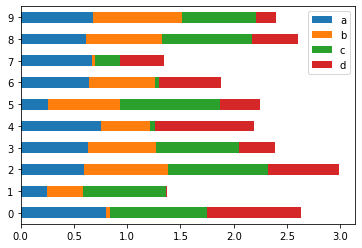

In [9]:
df.plot.barh(stacked=True);

**Histograma**

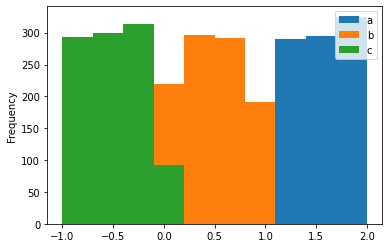

In [10]:
df=pd.DataFrame({'a': np.random.rand(1000)+1,
                 'b': np.random.rand(1000),
                 'c': np.random.rand(1000)-1})

df.plot.hist();

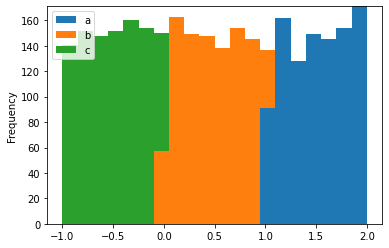

In [11]:
df.plot.hist(stacked=True, bins=20);  # bins=nº de barras

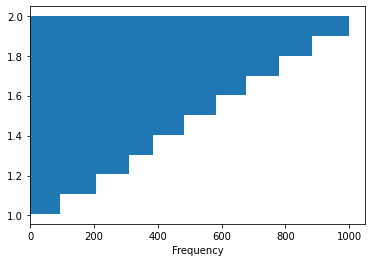

In [12]:
df['a'].plot.hist(orientation='horizontal', cumulative=True);

**Box plots**

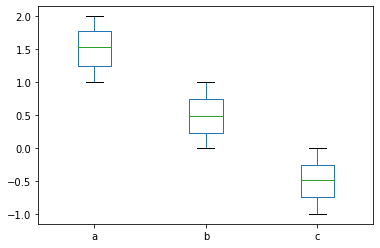

In [13]:
df.plot.box();

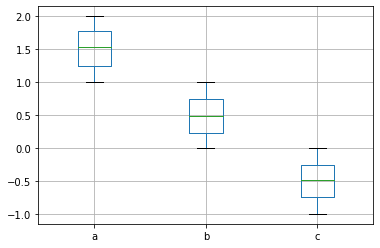

In [14]:
df.boxplot();

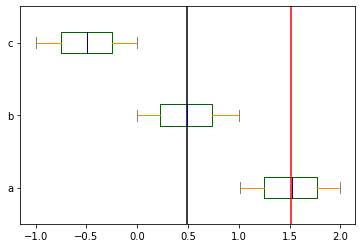

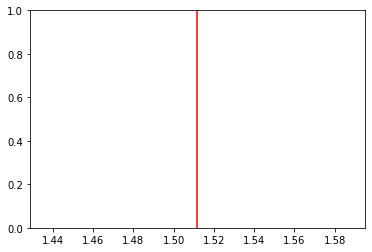

In [15]:
color={'boxes': 'DarkGreen',
       'whiskers': 'DarkOrange',
       'medians': 'DarkBlue',
       'caps': 'Gray'}

df.plot.box(color=color, 
            vert=False)

plt.axvline(df['b'].mean(), color='k')
plt.axvline(df['a'].mean(), color='r')

plt.show();

plt.axvline(df['a'].mean(), color='r')

**Area plot**

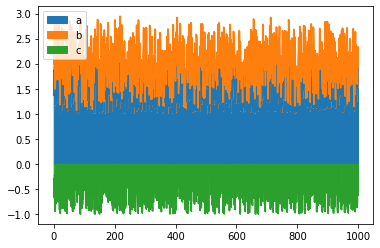

In [16]:
df.plot.area();

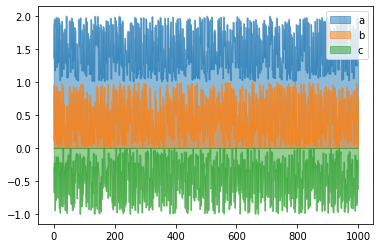

In [17]:
df.plot.area(stacked=False);

**Scatter plot**

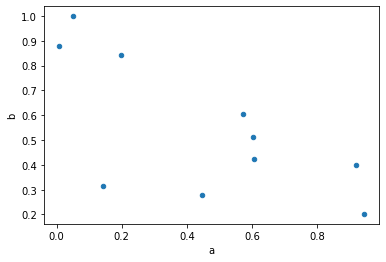

In [18]:
df=pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df.plot.scatter(x='a', y='b');

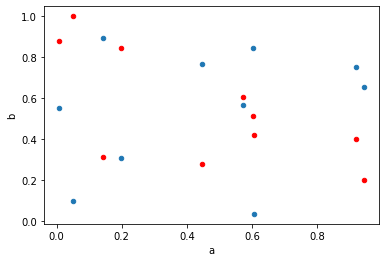

In [19]:
ax=df.plot.scatter(x='a', y='c')

df.plot.scatter(x='a', y='b', color='r', ax=ax);  # en este caso hay que darle el ax para que esten en el mismo plot

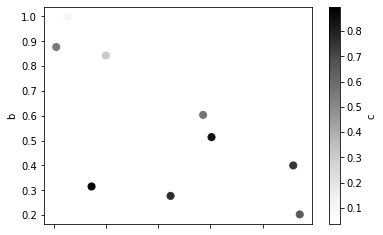

In [20]:
df.plot.scatter(x='a', y='b', c='c', s=50);   # s tamaño del punto

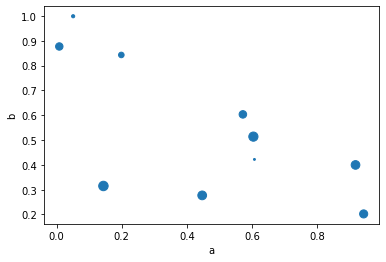

In [21]:
df.plot.scatter(x='a', y='b', s=df.c * 100);

**Hexagonal bin plot**

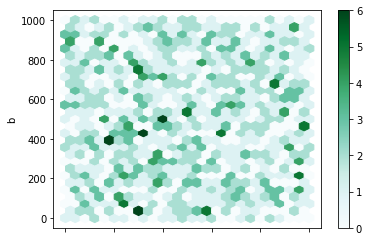

In [22]:
df=pd.DataFrame(np.random.rand(1000, 2), columns=['a', 'b'])

df['b']=df['b'] + np.arange(1000)

df.plot.hexbin(x='a', y='b', gridsize=25);

**Pie plot**

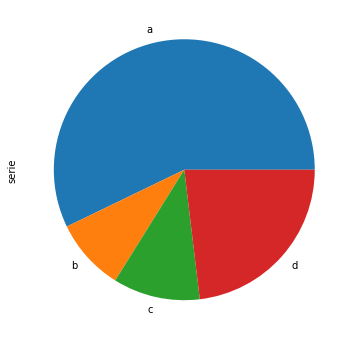

In [23]:
serie=pd.Series(3*np.random.rand(4), index=['a', 'b', 'c', 'd'], name='serie')

serie.plot.pie(figsize=(6, 6));

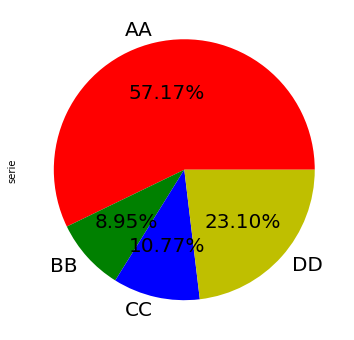

In [24]:
serie.plot.pie(labels=['AA', 'BB', 'CC', 'DD'],
               colors=['r', 'g', 'b', 'y'],
               autopct='%.2f%%',
               fontsize=20,
               figsize=(6, 6));

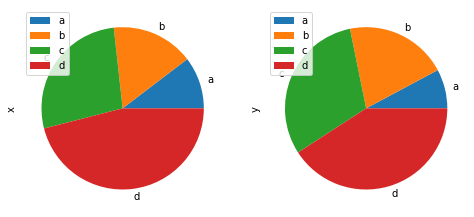

In [25]:
df=pd.DataFrame(3*np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])

df.plot.pie(subplots=True, figsize=(8, 4));

**Scatter matrix plot**

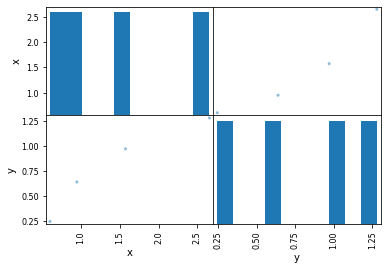

In [26]:
pd.plotting.scatter_matrix(df);

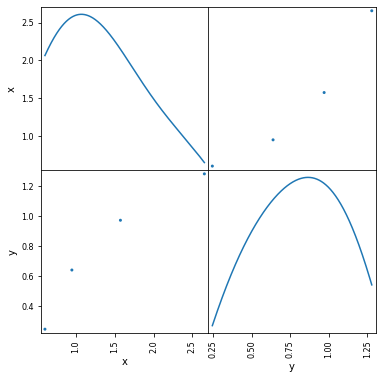

In [27]:
pd.plotting.scatter_matrix(df, 
                          alpha=1,
                          figsize=(6, 6),
                          diagonal='kde');

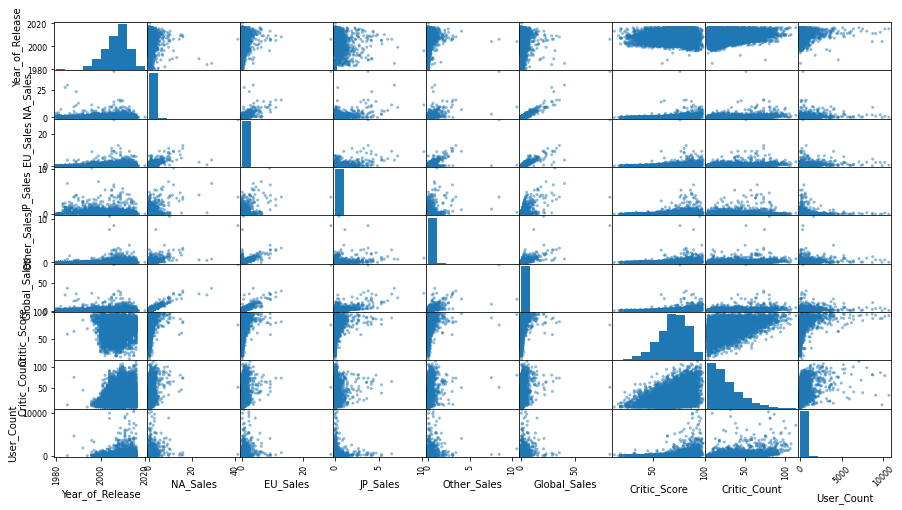

In [28]:
df=pd.read_csv('../data/video_games_sales.csv')

pd.plotting.scatter_matrix(df, figsize=(15, 8))

plt.xticks(rotation=45);

**curvas de Andrews**

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


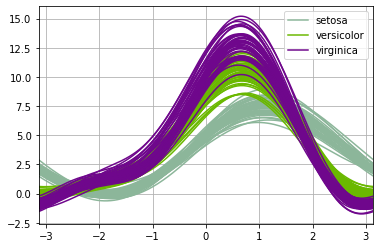

In [29]:
from pandas.plotting import andrews_curves

data=sns.load_dataset('iris')

display(data.head())

andrews_curves(data, 'species');

**coordenadas paralelas**

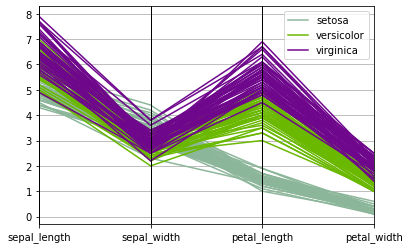

In [30]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(data, 'species');

# Extensiones para Jupyter


### Lux

https://github.com/lux-org/lux-widget

In [31]:
import lux

In [32]:
import pandas as pd

df=pd.read_csv('../data/student-por.csv', sep=';')
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### QGrid

https://github.com/quantopian/qgrid

In [33]:
import qgrid

In [34]:
q_df=qgrid.show_grid(df, show_toolbar=True)
q_df

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### iTables

https://github.com/mwouts/itables

In [35]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

from itables import show

import world_bank_data as wb

<IPython.core.display.Javascript object>

In [36]:
df_c=wb.get_countries()
show(df_c)

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,


### ipyvolume

https://github.com/maartenbreddels/ipyvolume

In [37]:
import ipyvolume

In [38]:
ipyvolume.examples.ball(rmax=3, rmin=2.5, shape=32, lighting=True)

Volume(data=array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0.,…

In [39]:
ds=ipyvolume.datasets.aquariusA2.fetch()

ipyvolume.quickvolshow(ds.data, lighting=True)

### bqplot

https://github.com/bqplot/bqplot

In [40]:
from bqplot import pyplot as plt

In [41]:
plt.figure(title='Plot')
plt.plot(np.arange(100), np.cumsum(np.random.randn(100)*100.0))
plt.show()